In [1]:
#import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


For reference, the data source is https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

In [2]:
#loading in data
data = pd.read_csv('drug_consumption.csv', header = None)

In [3]:
# adding column names, original .csv file did not have a header 
data.columns = ['id', 'age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 
                'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstacy', 'heroin', 'ketamine',
                'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']

In [4]:
#creating new dataframe to only contain the nicotine column as target 
data_nic = data.drop(columns=['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstacy', 'heroin', 
                              'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'semer', 'vsa'])

In [5]:
data_nic.head(1)

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2


In [7]:
#splitting dataset into training and test set 

from sklearn.model_selection import train_test_split
nictrain_set, nictest_set = train_test_split(data_nic, test_size = 0.2, random_state = 66)

In [8]:
#getting a quick overview of the training data 

nictrain_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 457 to 1044
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1508 non-null   int64  
 1   age        1508 non-null   float64
 2   gender     1508 non-null   float64
 3   education  1508 non-null   float64
 4   country    1508 non-null   float64
 5   ethnicity  1508 non-null   float64
 6   nscore     1508 non-null   float64
 7   escore     1508 non-null   float64
 8   oscore     1508 non-null   float64
 9   ascore     1508 non-null   float64
 10  cscore     1508 non-null   float64
 11  impulsive  1508 non-null   float64
 12  ss         1508 non-null   float64
 13  nicotine   1508 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 176.7+ KB


In [9]:
nictrain_set.describe()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,951.460875,0.031860,0.007678,-0.007754,0.356974,-0.310391,-0.003368,0.003559,0.000473,-0.008244,0.006644,0.012763,-0.001267
std,544.630053,0.877406,0.482559,0.939813,0.700688,0.147123,0.996381,0.990322,1.000274,1.003217,1.008137,0.966044,0.975193
min,1.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,481.750000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.760960,-0.652530,-0.711260,-0.846370
50%,959.500000,-0.078540,0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1421.500000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.633055,0.628243,0.529750,0.765400
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.005370,2.901610,3.464360,3.464360,2.901610,1.921730


In [13]:
#looking at proportion of each category from training and test set, to make sure that the split didn't lead to imbalances 

targetprop_train = nictrain_set['nicotine'].value_counts(normalize=True)
targetprop_test = nictest_set['nicotine'].value_counts(normalize=True)

print(targetprop_train, targetprop_test)

#can see that the proportion of each category is relatively similar, so we can proceed with the train/test split above 

nicotine
CL6    0.317639
CL0    0.230769
CL2    0.110743
CL1    0.102122
CL3    0.098143
CL5    0.085544
CL4    0.055040
Name: proportion, dtype: float64 nicotine
CL6    0.347480
CL0    0.212202
CL1    0.103448
CL2    0.098143
CL3    0.098143
CL5    0.074271
CL4    0.066313
Name: proportion, dtype: float64


We can see that the target variable has 7 different categories. The question we would like to investigate is whether or not an individual is at risk of being a frequent consumer of a particular drug. To answer this question, we can further discretise the target variable into 3 categories. 

* freq_user - Frequent user of particular drug. This category will encompass CL5 and CL6 
* infreq_user - Infrequent user of a particular drug. This category will encompass CL3 and CL4 
* Non-user - Not a user of particular drug. This category will encompass CL0, CL1, CL2

In [14]:
#grouping values in the target variable to create 3 new categories 
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL5', 'CL6'], 'freq_user')
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL3', 'CL4'], 'infreq_user')
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL0', 'CL1', 'CL2'], 'non_user')

nictest_set['nicotine'] = nictest_set['nicotine'].replace(['CL5', 'CL6'], 'freq_user')
nictest_set['nicotine'] = nictest_set['nicotine'].replace(['CL3', 'CL4'], 'infreq_user')
nictest_set['nicotine'] = nictest_set['nicotine'].replace(['CL0', 'CL1', 'CL2'], 'non_user')

In [15]:
#function for generating a subset of the original training set 
def subset (feature, value):
    newdat = nictrain_set[nictrain_set[feature] == value]
    newdat_count = newdat['nicotine'].value_counts()
    return(newdat_count)

# Data Exploration

We want to first have a look at the frequency of each category for each feature. This is done to identify categories that have very few observations. We also want to have a look at the frequency of nicotine consumption for each category, for each feature. If we are able to identifies categories that have similar nicotine consumption patterns, then we can consider combining these categories. 

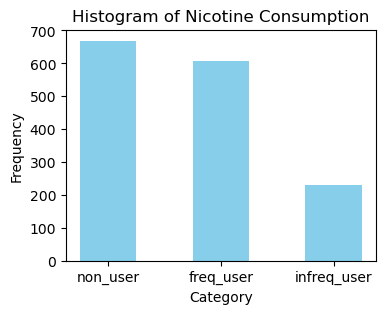

In [16]:
#Visualise proportion of each category in the target variable 
nicotine_counts = nictrain_set['nicotine'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(nicotine_counts.index, nicotine_counts.values, color='skyblue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Nicotine Consumption')
plt.show()

Looking at the entire training set, it appears that the most frequent category for nicotine consumption are non users. This is followed by frequent users, with infrequent users being the least common category

## Exploring Age

In [17]:
frequency_age = nictrain_set['age'].value_counts()

print(frequency_age)

age
-0.95197    517
-0.07854    378
 0.49788    296
 1.09449    229
 1.82213     73
 2.59171     15
Name: count, dtype: int64


We can see that there is quite an even spread of ages surveyed, until the final two categories (55-64 and 64+)

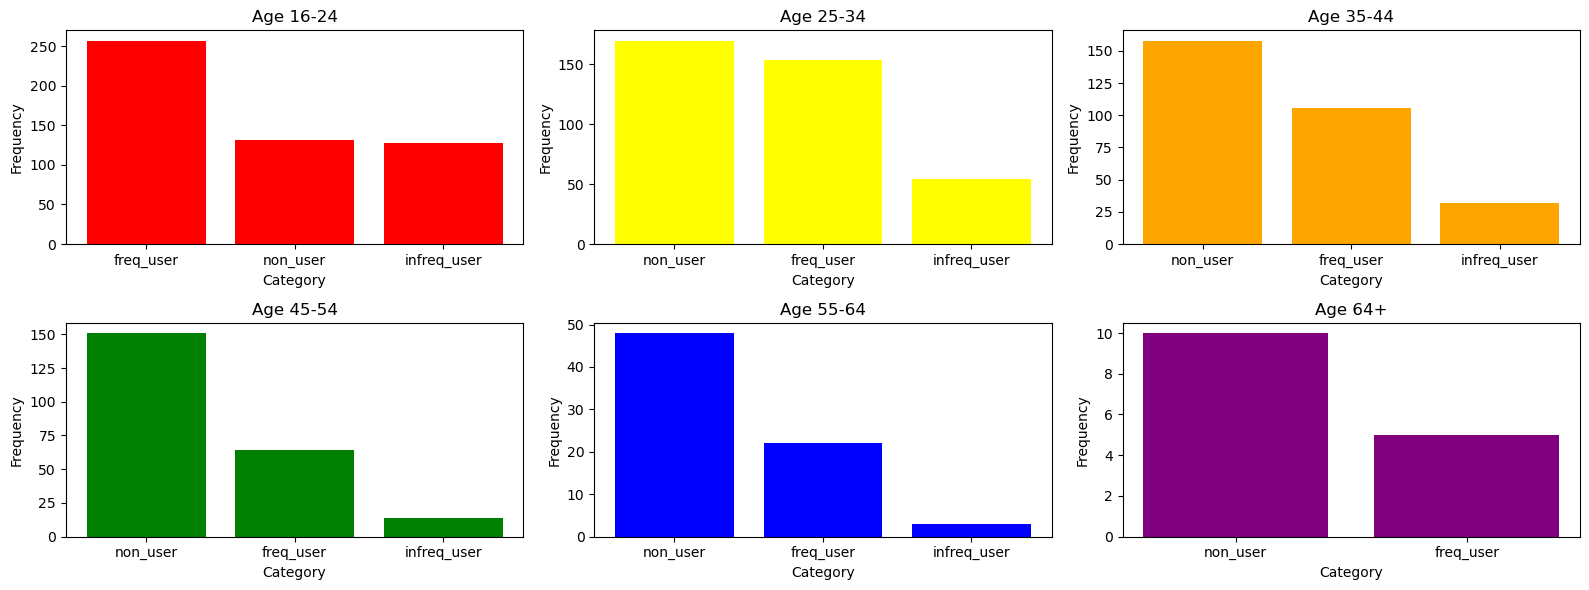

In [18]:
#plotting the frequency of nicotine consumption, comparing the different age categories 

nicotine_counts_1624 = subset('age', -0.95197)
nicotine_counts_2534 = subset('age', -0.07854)
nicotine_counts_3544 = subset('age', 0.49788)
nicotine_counts_4554 = subset('age', 1.09449)
nicotine_counts_5564 = subset('age', 1.82213)
nicotine_counts_64plus = subset('age', 2.59171)

plt.figure(figsize=(16, 6))

plt.subplot(2, 3, 1) #row, column, subplot
plt.bar(nicotine_counts_1624.index, nicotine_counts_1624.values, color='red')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 16-24')

plt.subplot(2, 3, 2)  
plt.bar(nicotine_counts_2534.index, nicotine_counts_2534.values, color='yellow')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 25-34')

plt.subplot(2, 3, 3)  
plt.bar(nicotine_counts_3544.index, nicotine_counts_3544.values, color='orange')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 35-44')

plt.subplot(2, 3, 4)
plt.bar(nicotine_counts_4554.index, nicotine_counts_4554.values, color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 45-54')

plt.subplot(2, 3, 5)
plt.bar(nicotine_counts_5564.index, nicotine_counts_5564.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 55-64')

plt.subplot(2, 3, 6)
plt.bar(nicotine_counts_64plus.index, nicotine_counts_64plus.values, color='purple')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 64+')

plt.tight_layout()
plt.show()

It appears that the younger individuals surveyed are more likely to be frequent nicotine users. As age increases, the proportion of non users to frequent users increases. For all categories, infrequent users are the least common category (apart from ages 16-24). This speaks to the addictive nature of nicotine. The fact that ages 16-24 have a relatively large proportion of infrequent users can be attributed to social factors, such as trying nicotine for the first time due to peer pressure. 

Recall that ages 55-64 and ages 64+ tend to have few observations. As both age categories exhibit similar patterns when it comes to nicotine consumption, there is justification to combine these categories together. 

## Exploring Gender

In [19]:
frequency_gender = nictrain_set['gender'].value_counts()
print(frequency_gender)

gender
 0.48246    766
-0.48246    742
Name: count, dtype: int64


We can see that there is almost an even split between males and females in the study 

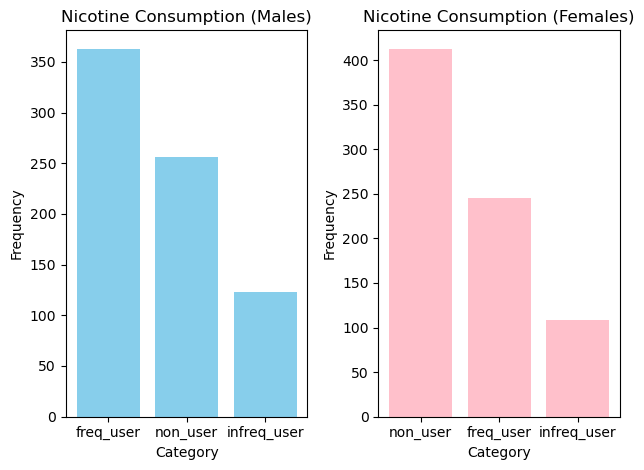

In [20]:
#plotting the frequency of nicotine consumption for males and females separately 

nicotine_counts_male = subset('gender',  -0.48246)
nicotine_counts_female = subset('gender',  0.48246)


plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_male.index, nicotine_counts_male.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Males)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_female.index, nicotine_counts_female.values, color='pink')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Females)')

plt.tight_layout()
plt.show()

The above plot shows that it is more common for Females to be non users of nicotine, whilst it is most common for males to be frequent users. For both genders, it is least common for the individuals to be infrequent users, once again speaking to the addictive nature of nicotine. 



## Exploring Education

In [21]:
frequency_education = nictrain_set['education'].value_counts()
print(frequency_education)

education
-0.61113    410
 0.45468    397
 1.16365    220
-0.05921    214
-1.73790     82
-1.22751     77
 1.98437     67
-2.43591     22
-1.43719     19
Name: count, dtype: int64


The least common education status of the individuals surveyed are 'left school at 17' (19 individuals), 'left school before 16' (22 individuals), 'doctorate degree' (67 individuals), 'left school at  18' (77 individuals) and 'left school at 16' (82 individuals)

Let's first explore the patterns of nicotine consumption for individuals who left school before 16, left school at 16, left school at 17 and left school at 18. 

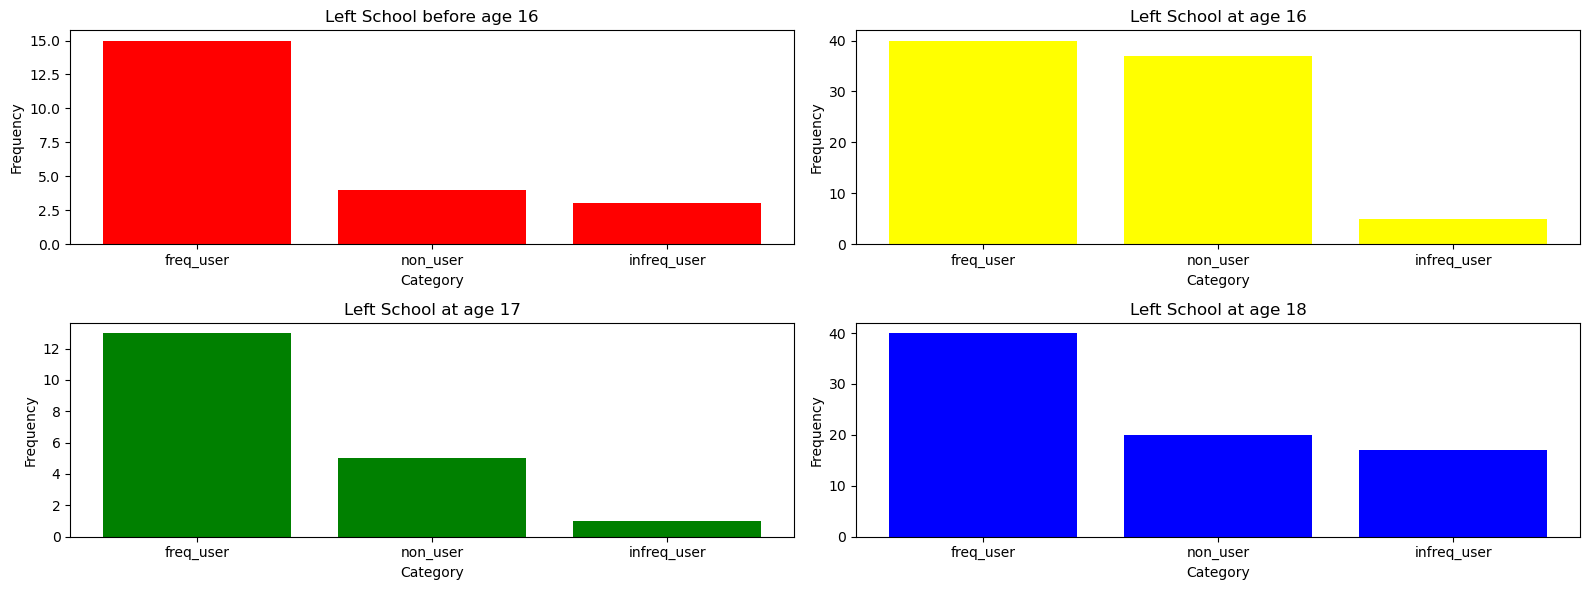

In [22]:
nicotine_counts_before16 = subset('education', -2.43591)
nicotine_counts_at16 = subset('education', -1.73790)
nicotine_counts_at17 = subset('education', -1.43719)
nicotine_counts_at18 = subset('education', -1.22751)

plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1) #row, column, subplot
plt.bar(nicotine_counts_before16.index, nicotine_counts_before16.values, color='red')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Left School before age 16')

plt.subplot(2, 2, 2) #row, column, subplot
plt.bar(nicotine_counts_at16.index, nicotine_counts_at16.values, color='yellow')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Left School at age 16')

plt.subplot(2, 2, 3) #row, column, subplot
plt.bar(nicotine_counts_at17.index, nicotine_counts_at17.values, color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Left School at age 17')

plt.subplot(2, 2, 4) #row, column, subplot
plt.bar(nicotine_counts_at18.index, nicotine_counts_at18.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Left School at age 18')

plt.tight_layout()
plt.show()

It is perhaps not surprising that it is most common to be frequent users of nicotine for all 4 education status'. The proportion of frequent user to non users also seem pretty consistent with the exception of individuals who left school at age 16 (where it appears that there is an equal proportion of frequent users and non users). Let's now have a look at what the histogram of nicotine consumption looks like if we combine these 4 categories into one. 

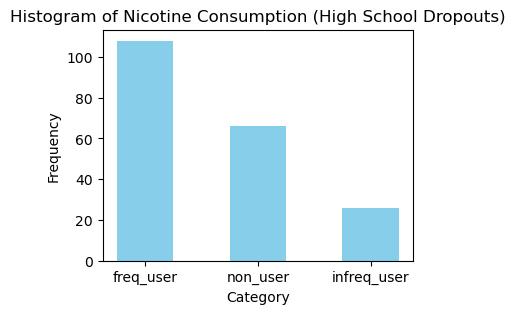

In [23]:
nictrain_set_dropouts = nictrain_set[nictrain_set['education'].isin([-2.43591, -1.73790, -1.43719, -1.22751])]
nicotine_counts_dropouts = nictrain_set_dropouts['nicotine'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(nicotine_counts_dropouts.index, nicotine_counts_dropouts.values, color='skyblue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Nicotine Consumption (High School Dropouts)')
plt.show()

The histogram above demonstrates that combining the 4 aforementioned categories should not lead to any substantial loss of information. Let's now compare the above histogram (high school dropouts) to the remaining education status'. 

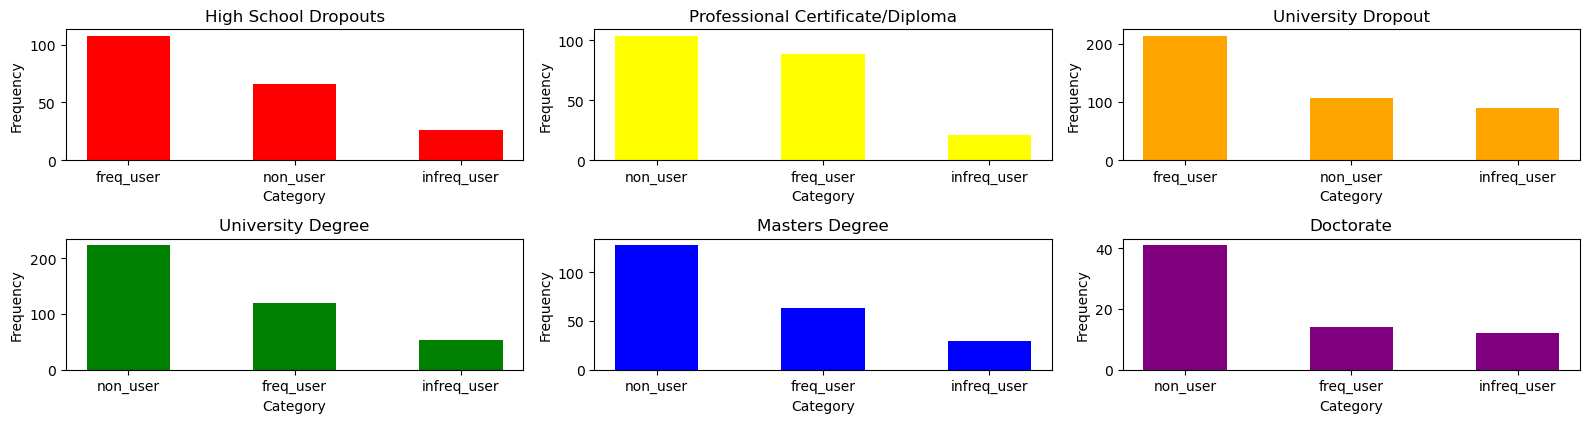

In [24]:
nicotine_counts_diploma = subset('education', -0.05921)
nicotine_counts_unidropout = subset('education', -0.61113)
nicotine_counts_unidegree = subset('education', 0.45468)
nicotine_counts_masters = subset('education', 1.16365)
nicotine_counts_doctorate = subset('education', 1.98437)



plt.figure(figsize=(16, 6))

plt.subplot(3, 3, 1) #row, column, subplot
plt.bar(nicotine_counts_dropouts.index, nicotine_counts_dropouts.values, color='red', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('High School Dropouts')

plt.subplot(3, 3, 2) #row, column, subplot
plt.bar(nicotine_counts_diploma.index, nicotine_counts_diploma.values, color='yellow', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Professional Certificate/Diploma')

plt.subplot(3, 3, 3) #row, column, subplot
plt.bar(nicotine_counts_unidropout.index, nicotine_counts_unidropout.values, color='orange', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('University Dropout')

plt.subplot(3, 3, 4) #row, column, subplot
plt.bar(nicotine_counts_unidegree.index, nicotine_counts_unidegree.values, color='green', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('University Degree')

plt.subplot(3, 3, 5) #row, column, subplot
plt.bar(nicotine_counts_masters.index, nicotine_counts_masters.values, color='blue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Masters Degree')

plt.subplot(3, 3, 6) #row, column, subplot
plt.bar(nicotine_counts_doctorate.index, nicotine_counts_doctorate.values, color='purple', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Doctorate')

plt.tight_layout()
plt.show()






It is immediately  noticeable that high school and university dropouts have the greatest proportion of frequent nicotine users. The other 4 education categories all have non users as the greatest proportion of nicotine consumption. Those with a professional certificate/diploma (i.e. those that completed secondary school but did not move on to tertiary level education) have an almost equal proportion of nicotine non users and frequent users.

Based on this, it may be possible to combine high school and university dropouts into one category, whilst also combining university degree holders, masters degree holders and doctorate degree holders into another category. 

## Exploring Country

In [25]:
frequency_country = nictrain_set['country'].value_counts()
print(frequency_country)


country
 0.96082    838
-0.57009    446
-0.28519     93
 0.24923     66
-0.09765     46
 0.21128     16
-0.46841      3
Name: count, dtype: int64


We can see that there are only 3 observations for -0.46841 (New Zealand), so could consider removing these observations. There are also only 16 observations for 0.21128 (Republic of Ireland). However, we could consider combining these observations with the UK observations. Let's take a lot at their histograms. 

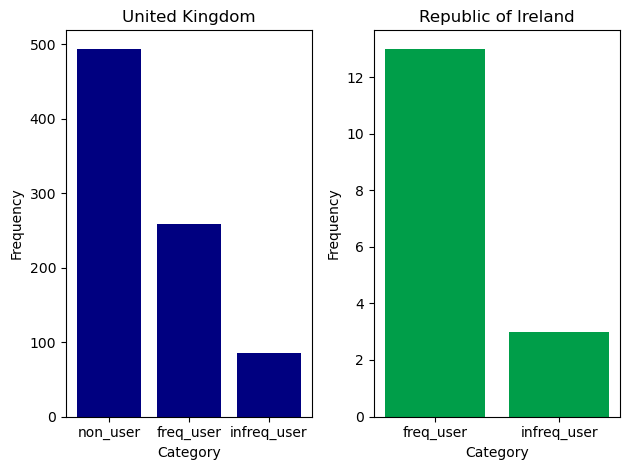

In [26]:
nicotine_counts_uk = subset('country', 0.96082)
nicotine_counts_ireland = subset('country', 0.21128)

plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_uk.index, nicotine_counts_uk.values, color='navy')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('United Kingdom')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_ireland.index, nicotine_counts_ireland.values, color='#009E49')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Republic of Ireland')

plt.tight_layout()
plt.show()

We can see that of the users from Republic of Ireland that were surveyed, majority are frequent users of nicotine. This is not equivalent to the pattern seen in the individuals from the UK that were surveyed. 

We could potentially deal with the few observations for New Zealand and Canada by combining them with Australia and the US respectively. Consider the following histograms. 

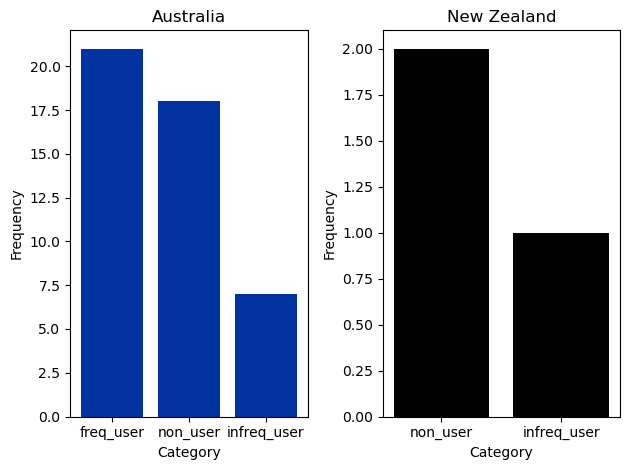

In [27]:
nicotine_counts_australia = subset('country', -0.09765)
nicotine_counts_nz = subset('country', -0.46841)

plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_australia.index, nicotine_counts_australia.values, color='#0033A0')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Australia')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_nz.index, nicotine_counts_nz.values, color='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('New Zealand')

plt.tight_layout()
plt.show()

Once again, it doesn't seem like it would be a good idea to combine these two countries into one category, as they exhibit different nicotine consumption patterns. 

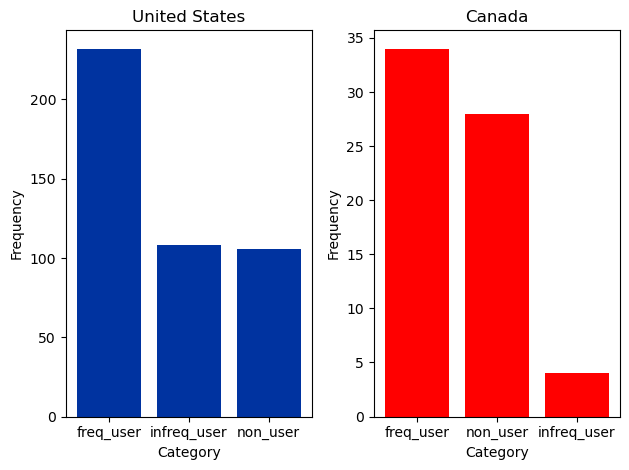

In [28]:
nicotine_counts_usa = subset('country', -0.57009)
nicotine_counts_canada = subset('country', 0.24923)

plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_usa.index, nicotine_counts_usa.values, color='#0033A0')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('United States')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_canada.index, nicotine_counts_canada.values, color='#FF0000')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Canada')

plt.tight_layout()
plt.show()

Although both the US and Canada have frequent users as the most common category for nicotine consumption, the US seems to have almost equal numbers of infrequent and non users of nicotine whereas Canada has significantly more non users and very few infrequent users. As the above analysis doesn't provide justification for combining the country categories in the ways suggested, an alternative method should be considered. Perhaps it would be best to combine all countries with few observations with the 'other' category. 

## Exploring Ethnicity

In [29]:
frequency_ethnicity = nictrain_set['ethnicity'].value_counts()
print(frequency_ethnicity)

#majority of the ethnicities in training set is -0.31685 (white). there are small numbers of other ethnicities, so could consider combining them. 

ethnicity
-0.31685    1378
 0.11440      53
-0.50212      24
-1.10702      23
-0.22166      16
 0.12600      13
 1.90725       1
Name: count, dtype: int64


To investigate whether or not we should combine all ethnicities that aren't white into one category, we should compare the frequency of nicotine consumption for the minorities in this dataset. 

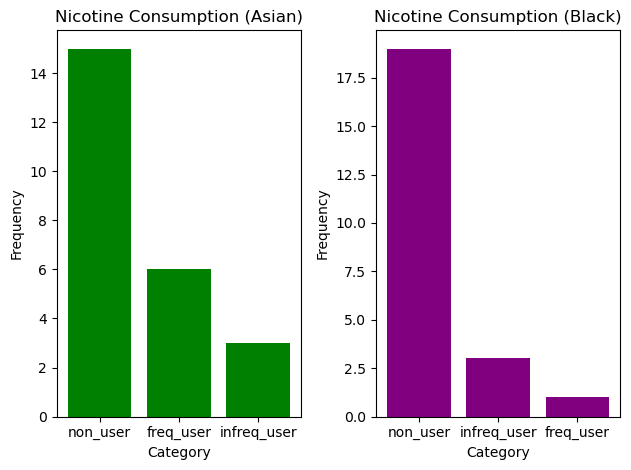

In [30]:
#plotting the frequency of nicotine consumption, comparing asians and blacks 

nicotine_counts_asian = subset('ethnicity', -0.50212)
nicotine_counts_black = subset('ethnicity', -1.10702)

plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_asian.index, nicotine_counts_asian.values, color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Asian)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_black.index, nicotine_counts_black.values, color='purple')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Black)')

plt.tight_layout()
plt.show()

It looks as if for both Asians and Blacks, majority of individuals have never used nicotine. Let's now compare the above histograms with the frequency of nicotine consumption when combining both ethnicities together. 

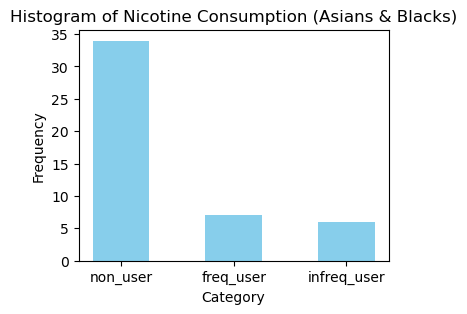

In [31]:
nictrain_set_asianblack = nictrain_set[nictrain_set['ethnicity'].isin([-0.50212, -1.10702])]
nicotine_counts_asianblack = nictrain_set_asianblack['nicotine'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(nicotine_counts_asianblack.index, nicotine_counts_asianblack.values, color='skyblue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Nicotine Consumption (Asians & Blacks)')
plt.show()

We can see that for Asians, the second most likely category is freq_user. The second most likely category for Blacks is infreq_user. However, this distinction becomes blurred when we combine Asians and Blacks together. This suggests that it would not be the best idea to combine these categories together. However, the lack of observations present in each category also presents a problem. Once again, we may be best of combining all of the ethnicities with very few observations into one group called 'other'

## Exploring Neuroticism

Text(0.5, 0, 'nscore values')

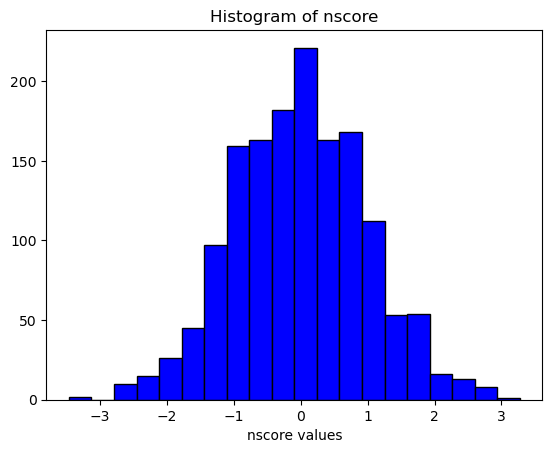

In [32]:
plt.hist(nictrain_set.nscore, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of nscore")
plt.xlabel("nscore values")

We can see that the nscore values are approximately normally distributed around 0, this is confirmed by the following summary statistics

In [33]:
print(nictrain_set['nscore'].describe())

count    1508.000000
mean       -0.003368
std         0.996381
min        -3.464360
25%        -0.678250
50%         0.042570
75%         0.629670
max         3.273930
Name: nscore, dtype: float64


We can now take a look at how nscore differs between frequent, infrequent and non users of nicotine

<Axes: xlabel='nscore', ylabel='nicotine'>

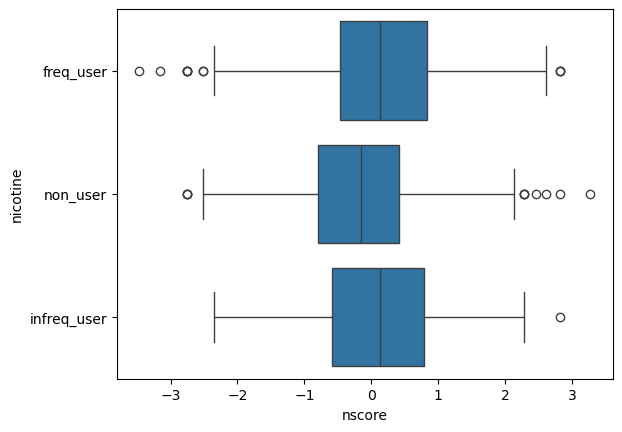

In [34]:
sns.boxplot(data = nictrain_set, x = "nscore", y="nicotine")

<Axes: xlabel='nscore', ylabel='nicotine'>

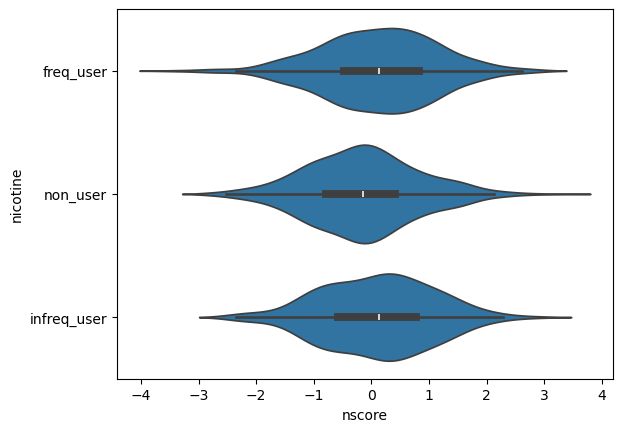

In [35]:
sns.violinplot(data = nictrain_set, x = "nscore", y="nicotine")

It looks like nscore doesn't seem to differ much between the 3 categories of nicotine users. The only minor pattern that can be identified is that non users of nicotine have a slightly lower nscore. 

## Exploring Extraversion

Text(0.5, 0, 'escore values')

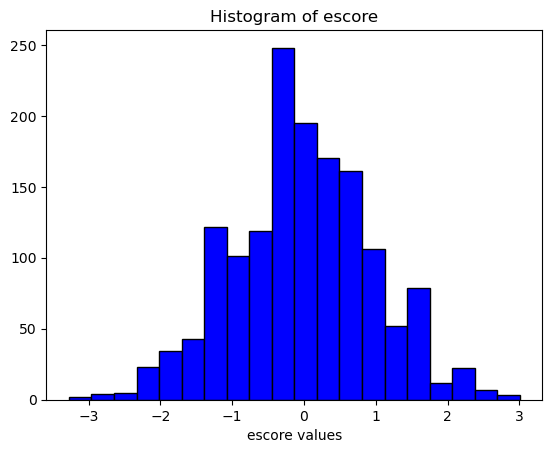

In [36]:
plt.hist(nictrain_set.escore, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of escore")
plt.xlabel("escore values")

In [37]:
print(nictrain_set['escore'].describe())

count    1508.000000
mean        0.003559
std         0.990322
min        -3.273930
25%        -0.695090
50%         0.003320
75%         0.637790
max         3.005370
Name: escore, dtype: float64


Once again, it looks like the escore values are approximately normally distributed around zero. 

<Axes: xlabel='escore', ylabel='nicotine'>

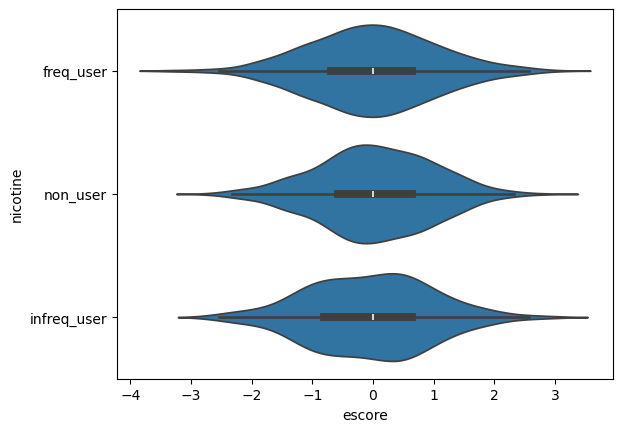

In [38]:
sns.violinplot(data = nictrain_set, x = "escore", y="nicotine")

Once again, it doesn't appear that escore has any significant impact on nicotine usage 

## Exploring Openness to Experience

Text(0.5, 0, 'oscore values')

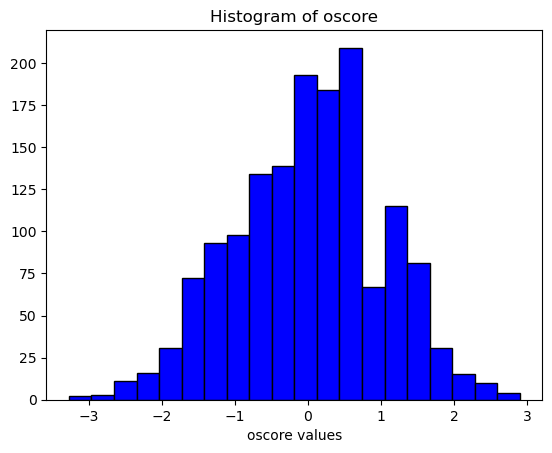

In [39]:
plt.hist(nictrain_set.oscore, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of oscore")
plt.xlabel("oscore values")

In [40]:
print(nictrain_set['oscore'].describe())

count    1508.000000
mean        0.000473
std         1.000274
min        -3.273930
25%        -0.717270
50%        -0.019280
75%         0.723300
max         2.901610
Name: oscore, dtype: float64


The histogram above shows that there is a slight right skew to the oscore value distribution. The most common oscore values are slightly greater than zero. However, the fact that the mean oscore values is 0.000473 means that there are more negative oscore values than positive oscore values.

<Axes: xlabel='oscore', ylabel='nicotine'>

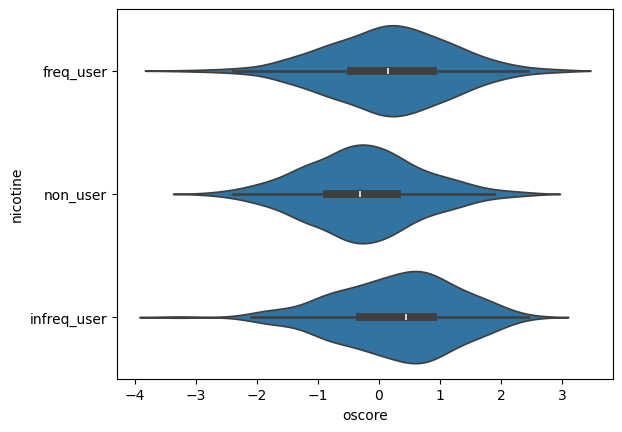

In [41]:
sns.violinplot(data = nictrain_set, x = "oscore", y="nicotine")

The violin plot shows that there is some variation when it comes to oscore values for different categories of nicotine consumption. Frequent users of nicotine have a median oscore value close to zero, whereas non users have the lowest median oscore value. It is notable that infrequent users have the highest median oscore value. 

## Exploring Agreeableness

Text(0.5, 0, 'ascore values')

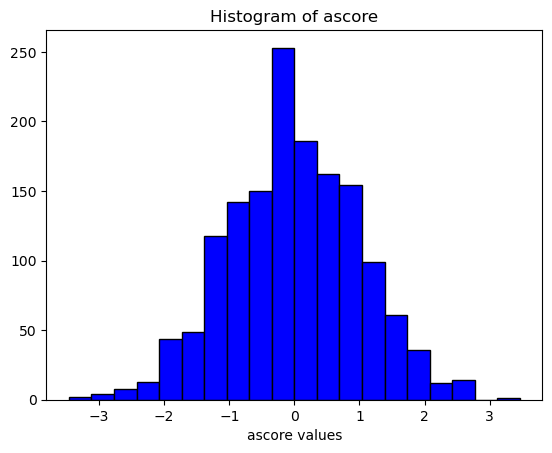

In [42]:
plt.hist(nictrain_set.ascore, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of ascore")
plt.xlabel("ascore values")

In [43]:
print(nictrain_set['ascore'].describe())

count    1508.000000
mean       -0.008244
std         1.003217
min        -3.464360
25%        -0.760960
50%        -0.017290
75%         0.633055
max         3.464360
Name: ascore, dtype: float64


<Axes: xlabel='ascore', ylabel='nicotine'>

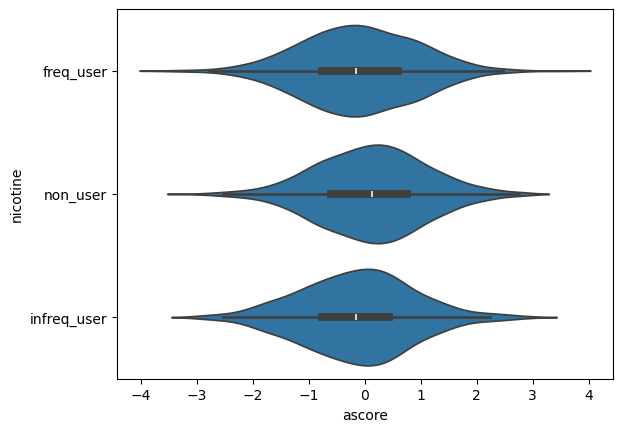

In [44]:
sns.violinplot(data = nictrain_set, x = "ascore", y="nicotine")

## Exploring Conscientiousness

Text(0.5, 0, 'cscore values')

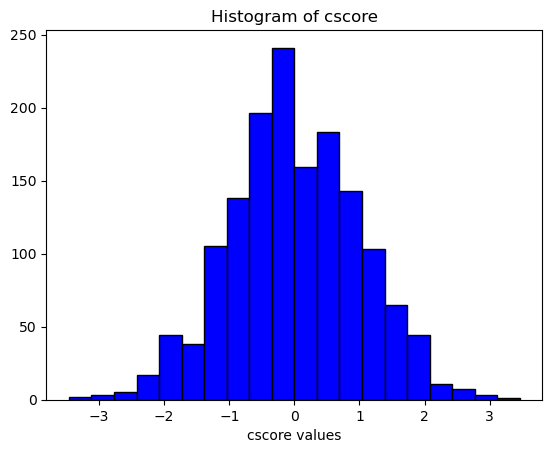

In [45]:
plt.hist(nictrain_set.cscore, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of cscore")
plt.xlabel("cscore values")

In [46]:
print(nictrain_set['cscore'].describe())

count    1508.000000
mean        0.006644
std         1.008137
min        -3.464360
25%        -0.652530
50%        -0.006650
75%         0.628243
max         3.464360
Name: cscore, dtype: float64


<Axes: xlabel='cscore', ylabel='nicotine'>

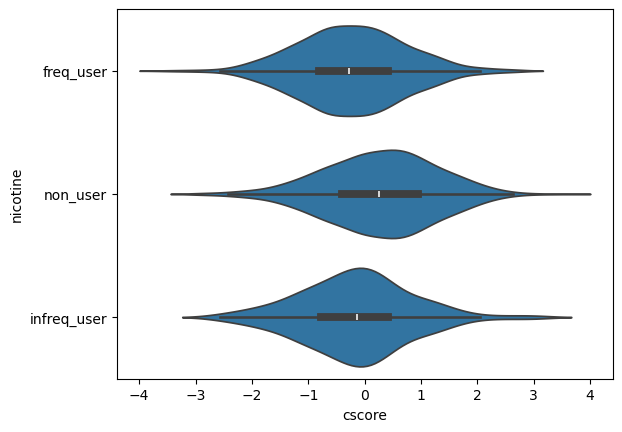

In [47]:
sns.violinplot(data = nictrain_set, x = "cscore", y="nicotine")

It is notable that non users seem to have a higher median cscore compared to both frequent and infrequent users

## Exploring Impulsiveness

Text(0.5, 0, 'BIS-11 impulsive values')

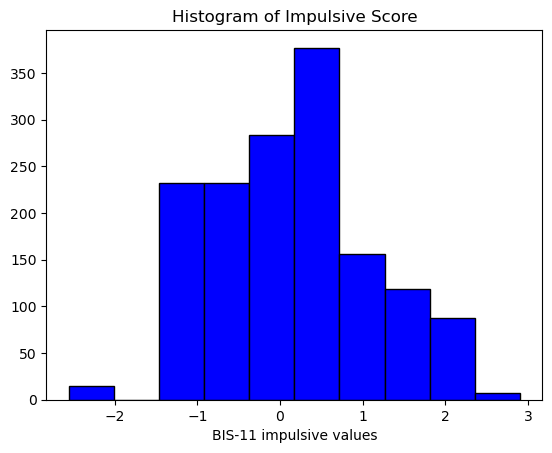

In [48]:
plt.hist(nictrain_set.impulsive, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Impulsive Score")
plt.xlabel("BIS-11 impulsive values")

In [49]:
print(nictrain_set['impulsive'].describe())

count    1508.000000
mean        0.012763
std         0.966044
min        -2.555240
25%        -0.711260
50%        -0.217120
75%         0.529750
max         2.901610
Name: impulsive, dtype: float64


<Axes: xlabel='impulsive', ylabel='nicotine'>

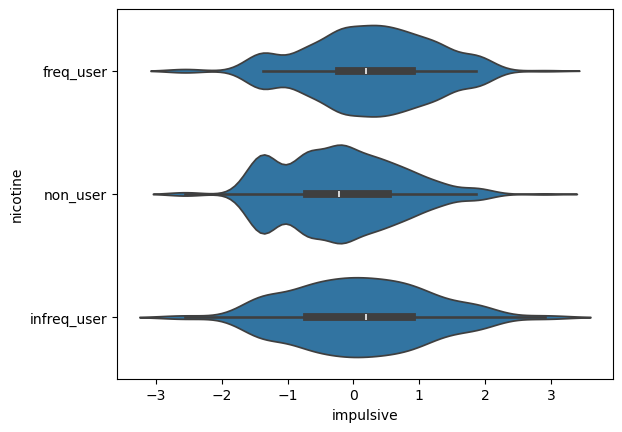

In [50]:
sns.violinplot(data = nictrain_set, x = "impulsive", y="nicotine")

It appears that nicotine non users have a lower impulsive score compared to frequent and infrequent users

## Exploring Sensation Seeking

Text(0.5, 0, 'ImpSS sensation seeking values')

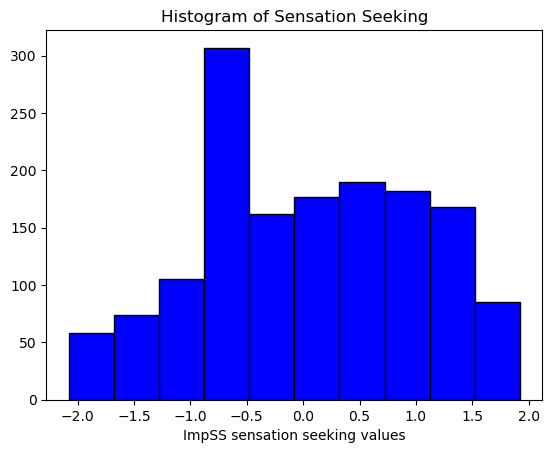

In [51]:
plt.hist(nictrain_set.ss, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Sensation Seeking")
plt.xlabel("ImpSS sensation seeking values")

In [52]:
print(nictrain_set['ss'].describe())

count    1508.000000
mean       -0.001267
std         0.975193
min        -2.078480
25%        -0.846370
50%         0.079870
75%         0.765400
max         1.921730
Name: ss, dtype: float64


<Axes: xlabel='ss', ylabel='nicotine'>

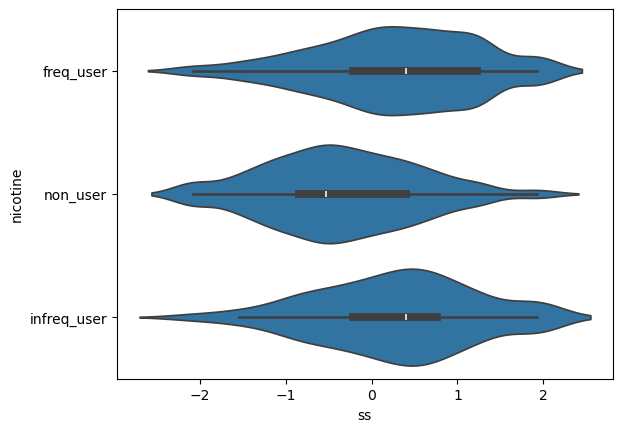

In [53]:
sns.violinplot(data = nictrain_set, x = "ss", y="nicotine")

Noticeable that non users have significantly lower sensastion seeking scores compared to frequent and infrequent users

# Data Processing

The following changes are to be made to the dataset. Justification for these changes can be seen above 

* 'age' - Combine 55-64 and 64+ categories into a new category called 55+
* 'education' - Condense variable into three categories, 'high school and university dropouts', 'professional certificate holders' and 'degree holders'
* 'country' - Combine 'australia', 'canada', 'new zealand', 'republic of ireland' into the 'other' category. This should leave 3 categories (usa, uk and other)
* 'ethnicity' - Combine all minority ethnicities into one category called 'other'. This should leave just 2 categories (white and other)

In addition to make interpretation easier, we want to change the values for each categorical variable from numbers into categories. We can then apply one hot encoding or ordinal encoding (depending on the nature of the variable) after. 

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

#FeatureCategoriser replaces the values of selected features with their 'actual' values (non-numeric), as well as implements certain categorisations
#as described above
class FeatureCategoriser(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return(self)
    
    def transform(self, X):
        X['age'] = X['age'].replace({
            -0.95197: '18-24',
            -0.07854: '25-34',
            0.49788: '35-44', 
            1.09449: '45-54', 
            1.82213: '55+',
            2.59171: '55+'
        })
        
        X['gender'] = X['gender'].replace({
            -0.48246: 'male', 
            0.48246: 'female'
        })
        
        X['education'] = X['education'].replace({
            -2.43591: 'dropout',
            -1.73790: 'dropout',
            -1.43719: 'dropout', 
            -1.22751: 'dropout', 
            -0.61113: 'dropout', 
            -0.05921: 'cert holder', 
            0.45468: 'degree holder', 
            1.16365: 'degree holder', 
            1.98437: 'degree holder'
        })
        
        X['country'] = X['country'].replace({
            -0.57009: 'usa', 
            0.96082: 'uk', 
            0.21128: 'other', 
            -0.28519: 'other', 
            -0.46841: 'other', 
            0.24923: 'other', 
            -0.09765: 'other'
        })
        
        X['ethnicity'] = X['ethnicity'].replace({
            -0.31685: 'white', 
            0.11440: 'other', 
            -0.22166: 'other', 
            0.12600: 'other', 
            1.90725: 'other', 
            -1.10702: 'other', 
            -0.50212: 'other'
        })
        return(X.drop(['id'], axis = 1))

#FeatureEncoder performs either one-hot encoding or ordinal encoding on the relevant features
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return(self)
    
    def transform(self, X):
        ordencoder_age = OrdinalEncoder(categories = [['18-24', '25-34', '35-44', '45-54', '55+']])
        ordencoder_education = OrdinalEncoder(categories = [['dropout', 'cert holder', 'degree holder']])
        X['age'] = ordencoder_age.fit_transform(X[['age']])
        X['education'] = ordencoder_education.fit_transform(X[['education']])
        
        encoder = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
        onehot_data = encoder.fit_transform(X[['gender', 'country', 'ethnicity']])
        onehot_result = pd.concat([X.drop(['gender', 'country', 'ethnicity'], axis = 1), onehot_data], axis = 1)
        return(onehot_result)

 
# The two transformers above are combined together in this pipeline
pipe = Pipeline([
    ("categoriser", FeatureCategoriser()), 
    ("encoder", FeatureEncoder())
])

#applying pipeline to process both the training and test sets
nictrain_processed = pipe.fit_transform(nictrain_set)
nictest_processed = pipe.fit_transform(nictest_set)


In [55]:
#lets now split the above datasets into feature and target sets

nictrain_x = nictrain_processed.drop('nicotine', axis = 1)
nictrain_y = nictrain_processed['nicotine']

nictest_x = nictest_processed.drop('nicotine', axis = 1)
nictest_y = nictest_processed['nicotine']

# Model Training

We are now in a position to begin training models. We want to initially train a selection of models, using cross validation to compare their performance. The most promising model will then be selected for further fine tuning and optimisation. 

In [56]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [57]:
#multinomial regression
from sklearn.linear_model import LogisticRegression

multinom_classifier = LogisticRegression()
multinom_scores = cross_val_score(multinom_classifier, nictrain_x, nictrain_y, cv = 10, scoring = "f1_macro")
display_scores(multinom_scores)

Scores: [0.41005073 0.4480034  0.43721202 0.43016469 0.43605805 0.4677252
 0.41858544 0.39222999 0.47409655 0.41660567]
Mean: 0.4330731734041204


In [58]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=66)
tree_scores = cross_val_score(tree_classifier, nictrain_x, nictrain_y, cv = 10, scoring = "f1_macro")
display_scores(tree_scores)

Scores: [0.46533333 0.45612335 0.40442351 0.4378789  0.44411131 0.41752799
 0.46828959 0.44667409 0.34470425 0.42180632]
Mean: 0.43068726420215686


In [59]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=66)
rf_classifier.fit(nictrain_x, nictrain_y)

rf_scores = cross_val_score(rf_classifier, nictrain_x, nictrain_y, cv = 10, scoring = "f1_macro")
display_scores(rf_scores)

Scores: [0.40116228 0.45464612 0.4490417  0.45973518 0.4651026  0.50631313
 0.39374022 0.43057912 0.4450277  0.44805896]
Mean: 0.4453407008170072


Based on this cross-validation scores, it looks like the random forest is the best performing.

# Model Finetuning

We will first perform hyperparameter optimisation using a grid search

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rfgrid_search = GridSearchCV(rf_classifier, param_grid, cv = 10, scoring = "f1_macro", return_train_score= True, verbose = 1)
rfgrid_search.fit(nictrain_x, nictrain_y)
rfgrid_search.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

We now try hyperparameter optimisation using Optuna

In [61]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 150, 250)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=66)
    
    scores = cross_val_score(model, nictrain_x, nictrain_y, cv = 10, scoring = "f1_macro")
    return(scores.mean())

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 20, show_progress_bar = True)

[I 2024-08-15 17:52:03,923] A new study created in memory with name: no-name-a992c53d-fdd8-4c5f-a642-c86f5e8c4771


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2024-08-15 17:52:05,686] Trial 0 finished with value: 0.4392251772109829 and parameters: {'n_estimators': 150, 'max_depth': 43, 'min_samples_split': 7}. Best is trial 0 with value: 0.4392251772109829.
[I 2024-08-15 17:52:08,505] Trial 1 finished with value: 0.44175575147652807 and parameters: {'n_estimators': 220, 'max_depth': 79, 'min_samples_split': 2}. Best is trial 1 with value: 0.44175575147652807.
[I 2024-08-15 17:52:10,450] Trial 2 finished with value: 0.4348431477198235 and parameters: {'n_estimators': 158, 'max_depth': 18, 'min_samples_split': 4}. Best is trial 1 with value: 0.44175575147652807.
[I 2024-08-15 17:52:12,582] Trial 3 finished with value: 0.4286498670058795 and parameters: {'n_estimators': 194, 'max_depth': 36, 'min_samples_split': 10}. Best is trial 1 with value: 0.44175575147652807.
[I 2024-08-15 17:52:14,931] Trial 4 finished with value: 0.4307318291545957 and parameters: {'n_estimators': 214, 'max_depth': 86, 'min_samples_split': 9}. Best is trial 1 with va

In [62]:
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.44742066690128723], datetime_start=datetime.datetime(2024, 8, 15, 17, 52, 34, 270451), datetime_complete=datetime.datetime(2024, 8, 15, 17, 52, 36, 918840), params={'n_estimators': 203, 'max_depth': 97, 'min_samples_split': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=250, log=False, low=150, step=1), 'max_depth': IntDistribution(high=100, log=False, low=10, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=13, value=None)
Best hyperparameters: {'n_estimators': 203, 'max_depth': 97, 'min_samples_split': 2}


The best trial value using Optuna was 0.447421. The hyperparameters which gave us this score was n_estimators = 203, max_depth = 97 and min_samples_split = 2

In [65]:
#we now run the random forest again, using the identified optimal hyperparameter values

rf_classifier_final = RandomForestClassifier(n_estimators=203, max_depth=97, min_samples_split=2, random_state=66)
rf_classifier_final.fit(nictrain_x, nictrain_y)

RandomForestClassifier(max_depth=97, n_estimators=203, random_state=66)

In [67]:
importances = rf_classifier_final.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': nictrain_x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

            Feature  Importance
6            cscore    0.122381
4            oscore    0.118836
2            nscore    0.117806
5            ascore    0.111325
3            escore    0.110918
8                ss    0.105482
7         impulsive    0.082565
0               age    0.065226
1         education    0.047814
12       country_uk    0.036150
13      country_usa    0.018975
10      gender_male    0.017597
9     gender_female    0.015288
11    country_other    0.011480
14  ethnicity_other    0.009148
15  ethnicity_white    0.009010
